# Data Mining Course Spark Exercise

## Sharif University of Technology

In this notebook we are going to analyze farsi wikipedia.
Outline of the exercise:

- Dataset preparation (5 Points)
- Preprocessing (35 Points)
- Exploration (20 Points)
- TF-IDF + Search (40 Points)

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites

You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only

You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).


# Section 0: Please enter your name below

# Name: امیرمحمد شعبانی

# Student Number: 97100449


# Section 1: Dataset preparation (5 Points)

This section of notebook contains only shell commands. You don't need to completely understand each command or change anything.

Please run all the paragraphs sequentially.


In [1]:
! sudo apt-get - y install wget git





wget is already the newest version (1.20.3-1ubuntu1).
git is already the newest version (1:2.25.1-1ubuntu3.2).
The following packages were automatically installed and are no longer required:
  linux-headers-5.4.0-84 linux-headers-5.4.0-84-generic
  linux-image-5.4.0-84-generic linux-modules-5.4.0-84-generic
  linux-modules-extra-5.4.0-84-generic
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


## Download the dump


In [ ]:
! wget - -no-check-certificate - P . https: // dumps.wikimedia.your.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2


--2021-11-06 11:50:23-- https://dumps.wikimedia.your.org/fawiki/latest/fawiki-latest-pages-articles-multistream.xml.bz2
Resolving dumps.wikimedia.your.org (dumps.wikimedia.your.org)... 204.9.55.82, 2001:4978:1:420::cc09:3752
Connecting to dumps.wikimedia.your.org (dumps.wikimedia.your.org)|204.9.55.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1002962062 (956M) [application/x-bzip]
Saving to: ‘./fawiki-latest-pages-articles-multistream.xml.bz2’

 fawiki-la 0%[ ] 0 --.-KB/s  fawiki-lat 0%[ ] 88.00K 361KB/s  fawiki-late 0%[ ] 263.78K 588KB/s  fawiki-lates 0%[ ] 487.78K 746KB/s  fawiki-latest 0%[ ] 951.78K 1.08MB/s  fawiki-latest- 0%[ ] 1.66M 1.56MB/s  fawiki-latest-p 0%[ ] 2.66M 2.10MB/s  fawiki-latest-pa 0%[ ] 4.49M 3.05MB/s  fawiki-latest-pag 0%[ ] 7.48M 4.46MB/s  fawiki-latest-page 1%[ ] 12.82M 6.81MB/s fawiki-latest-pages 1%[ ] 18.90M 9.05MB/s awiki-latest-pages- 2%[ ] 24.96M 10.9MB/s wiki-latest-pages-a 3%[ ] 30.68M 12.2MB/s iki-latest-pages-ar 3%[ ] 37.77M 13.8MB/s ki-latest-pages-art 4%[ ] 43.83M 14.9MB/s i-latest-pages-arti 5%[> ] 49.90M 15.8MB/s eta 57s -latest-pages-artic 5%[> ] 55.98M 17.7MB/s eta 57s latest-pages-articl 6%[> ] 62.04M 19.2MB/s eta 57s atest-pages-article 7%[> ] 68.10M 21.7MB/s eta 57s test-pages-articles 7%[> ] 74.16M 23.2MB/s eta 57s est-pages-articles- 8%[> ] 80.24M 24.5MB/s eta 46s st-pages-articles-m 9%[> ] 86.30M 26.8MB/s eta 46s t-pages-articles-mu 9%[> ] 92.37M 27.9MB/s eta 46s -pages-articles-mul 10%[=> ] 98.44M 28.8MB/s eta 46s pages-articles-mult 10%[=> ] 104.51M 29.4MB/s eta 46s ages-articles-multi 11%[=> ] 110.57M 29.4MB/s eta 40s ges-articles-multis 12%[=> ] 116.65M 29.4MB/s eta 40s es-articles-multist 12%[=> ] 122.71M 29.7MB/s eta 40s s-articles-multistr 13%[=> ] 128.77M 29.6MB/s eta 40s -articles-multistre 14%[=> ] 134.85M 29.5MB/s eta 40s articles-multistrea 14%[=> ] 141.51M 29.8MB/s eta 36s rticles-multistream 15%[==> ] 146.73M 29.5MB/s eta 36s ticles-multistream. 15%[==> ] 152.66M 29.5MB/s eta 36s icles-multistream.x 16%[==> ] 158.73M 29.5MB/s eta 36s cles-multistream.xm 17%[==> ] 164.80M 29.5MB/s eta 36s les-multistream.xml 17%[==> ] 170.87M 29.5MB/s eta 33s es-multistream.xml. 18%[==> ] 176.94M 29.5MB/s eta 33s s-multistream.xml.b 19%[==> ] 183.01M 29.5MB/s eta 33s -multistream.xml.bz 19%[==> ] 189.07M 29.5MB/s eta 33s multistream.xml.bz2 20%[===> ] 195.15M 29.5MB/s eta 33s ultistream.xml.bz2 21%[===> ] 201.21M 29.5MB/s eta 31s ltistream.xml.bz2 21%[===> ] 207.27M 29.5MB/s eta 31s tistream.xml.bz2 22%[===> ] 213.35M 29.5MB/s eta 31s istream.xml.bz2 22%[===> ] 219.41M 29.5MB/s eta 31s stream.xml.bz2 23%[===> ] 225.48M 29.5MB/s eta 31s tream.xml.bz2 24%[===> ] 231.55M 29.6MB/s eta 29s ream.xml.bz2 24%[===> ] 237.62M 29.6MB/s eta 29s eam.xml.bz2 25%[====> ] 243.68M 29.6MB/s eta 29s am.xml.bz2 26%[====> ] 249.76M 29.6MB/s eta 29s m.xml.bz2 26%[====> ] 255.82M 29.6MB/s eta 29s .xml.bz2 27%[====> ] 261.88M 29.6MB/s eta 27s xml.bz2 28%[====> ] 267.94M 29.6MB/s eta 27s ml.bz2 28%[====> ] 274.02M 29.6MB/s eta 27s l.bz2 29%[====> ] 280.08M 29.6MB/s eta 27s .bz2 29%[====> ] 286.15M 29.6MB/s eta 27s bz2 30%[=====> ] 292.19M 29.6MB/s eta 26s z2 31%[=====> ] 298.26M 29.6MB/s eta 26s 2 31%[=====> ] 303.98M 29.5MB/s eta 26s  32%[=====> ] 310.05M 29.5MB/s eta 26s  f 32%[=====> ] 315.62M 29.4MB/s eta 26s  fa 33%[=====> ] 321.69M 29.4MB/s eta 24s  faw 34%[=====> ] 327.76M 29.4MB/s eta 24s  fawi 34%[=====> ] 333.82M 29.4MB/s eta 24s  fawik 35%[======> ] 339.90M 29.4MB/s eta 24s  fawiki 36%[======> ] 345.96M 29.4MB/s eta 24s  fawiki- 36%[======> ] 352.02M 29.4MB/s eta 23s  fawiki-l 37%[======> ] 358.10M 29.4MB/s eta 23s  fawiki-la 38%[======> ] 364.16M 29.4MB/s eta 23s  fawiki-lat 38%[======> ] 370.23M 29.4MB/s eta 23s  fawiki-late 39%[======> ] 376.29M 29.4MB/s eta 23s  fawiki-lates 39%[======> ] 382.37M 29.4MB/s eta 22s  fawiki-latest 40%[=======> ] 388.43M 29.4MB/s eta 22s  fawiki-latest- 4

## Extract the dump (this may take a few minutes)


In [2]:
! bzip2 - d fawiki-latest-pages-articles-multistream.xml.bz2


## Clone git project for converting wikipedia xml dump to json


In [3]:
! pip install wikiextractor


  Using cached wikiextractor-3.0.6-py3-none-any.whl (46 kB)


## Run the script to convert xml to json (this might take around 30 minutes)


In [4]:
! python - m wikiextractor.WikiExtractor - -json fawiki-latest-pages-articles-multistream.xml


INFO: Preprocessing 'fawiki-latest-pages-articles-multistream.xml' to collect template definitions: this may take some time.
INFO: Preprocessed 100000 pages
INFO: Preprocessed 200000 pages
INFO: Preprocessed 300000 pages
INFO: Preprocessed 400000 pages
INFO: Preprocessed 500000 pages
INFO: Preprocessed 600000 pages
INFO: Preprocessed 700000 pages
INFO: Preprocessed 800000 pages
INFO: Preprocessed 900000 pages
INFO: Preprocessed 1000000 pages
INFO: Preprocessed 1100000 pages
INFO: Preprocessed 1200000 pages
INFO: Preprocessed 1300000 pages
INFO: Preprocessed 1400000 pages
INFO: Preprocessed 1500000 pages
INFO: Preprocessed 1600000 pages
INFO: Preprocessed 1700000 pages
INFO: Preprocessed 1800000 pages
INFO: Preprocessed 1900000 pages
INFO: Preprocessed 2000000 pages
INFO: Preprocessed 2100000 pages
INFO: Preprocessed 2200000 pages
INFO: Preprocessed 2300000 pages
INFO: Preprocessed 2400000 pages
INFO: Preprocessed 2500000 pages
INFO: Preprocessed 2600000 pages
INFO: Preprocessed 2700000

## Ensure output files exist


In [5]:
! ls text/*/*


text/AA/wiki_00  text/AH/wiki_71  text/AP/wiki_42  text/AX/wiki_13
text/AA/wiki_01  text/AH/wiki_72  text/AP/wiki_43  text/AX/wiki_14
text/AA/wiki_02  text/AH/wiki_73  text/AP/wiki_44  text/AX/wiki_15
text/AA/wiki_03  text/AH/wiki_74  text/AP/wiki_45  text/AX/wiki_16
text/AA/wiki_04  text/AH/wiki_75  text/AP/wiki_46  text/AX/wiki_17
text/AA/wiki_05  text/AH/wiki_76  text/AP/wiki_47  text/AX/wiki_18
text/AA/wiki_06  text/AH/wiki_77  text/AP/wiki_48  text/AX/wiki_19
text/AA/wiki_07  text/AH/wiki_78  text/AP/wiki_49  text/AX/wiki_20
text/AA/wiki_08  text/AH/wiki_79  text/AP/wiki_50  text/AX/wiki_21
text/AA/wiki_09  text/AH/wiki_80  text/AP/wiki_51  text/AX/wiki_22
text/AA/wiki_10  text/AH/wiki_81  text/AP/wiki_52  text/AX/wiki_23
text/AA/wiki_11  text/AH/wiki_82  text/AP/wiki_53  text/AX/wiki_24
text/AA/wiki_12  text/AH/wiki_83  text/AP/wiki_54  text/AX/wiki_25
text/AA/wiki_13  text/AH/wiki_84  text/AP/wiki_55  text/AX/wiki_26
text/AA/wiki_14  text/AH/wiki_85  text/AP/wiki_56  text/AX/wik

## Install Pypark & Initialization

Uncomment this section if you use google colab or local pc


In [2]:
! pip install pyspark


In [1]:
# if use local notebook
!pip install findspark
import findspark
findspark.init()


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("MDA_2021") \
    .master("local[*]") \
    .getOrCreate()

sc = spark.sparkContext


## Reading the data


In [3]:
# Now you have a RDD with wikipedia posts
articles_rdd = sc.textFile("text/*/*")
articles_rdd.take(1)


['{"id": "3918", "revid": "751215", "url": "https://fa.wikipedia.org/wiki?curid=3918", "title": "\\u062a\\u0631\\u06a9\\u06cc\\u0647", "text": "\\u062a\\u064f\\u0631\\u06a9\\u06cc\\u0650\\u0647 \\u0628\\u0627 \\u0646\\u0627\\u0645 \\u0631\\u0633\\u0645\\u06cc \\u062c\\u0645\\u0647\\u0648\\u0631\\u06cc \\u062a\\u0631\\u06a9\\u06cc\\u0647 \\u060c \\u06a9\\u0634\\u0648\\u0631\\u06cc \\u0641\\u0631\\u0627\\u0642\\u0627\\u0631\\u0647\\u200c\\u0627\\u06cc \\u062f\\u0631 \\u0627\\u0648\\u0631\\u0627\\u0633\\u06cc\\u0627 \\u0627\\u0633\\u062a \\u06a9\\u0647 \\u0628\\u062e\\u0634 \\u0628\\u0632\\u0631\\u06af \\u06a9\\u0634\\u0648\\u0631 \\u06cc\\u0639\\u0646\\u06cc \\u0622\\u0646\\u0627\\u062a\\u0648\\u0644\\u06cc (\\u0622\\u0633\\u06cc\\u0627\\u06cc \\u06a9\\u0648\\u0686\\u06a9) \\u062f\\u0631 \\u0642\\u0627\\u0631\\u0647 \\u0622\\u0633\\u06cc\\u0627 \\u0648 \\u0628\\u062e\\u0634 \\u06a9\\u0648\\u0686\\u06a9 \\u06cc\\u0639\\u0646\\u06cc \\u062a\\u0631\\u0627\\u06a9\\u06cc\\u0647 \\u062f\\u0631

In [ ]:
# uncomment it if you want run it on sample data
# sample = sc.parallelize(articles_rdd.takeSample(False, 1000))
# sample = sample.cache()


# Section 2: Preprocessing (35 Points)

In this section we will remove useless part (for example /n and /u200c) also find and remove stop words and remove the words with a low count in the corpus


In [4]:
# TODO: parse the json string
# uncomment if use sample data and comment next line
# articles_rdd = spark.read.json(sample).rdd
articles_rdd = spark.read.json(articles_rdd).rdd
articles_rdd.cache()


MapPartitionsRDD[16] at javaToPython at NativeMethodAccessorImpl.java:0

<h1 dir="rtl">
 حذف کردن حرف و نشانه‌های نگارشی اضافه 
</h1> 
<h2 dir="rtl">
 روی هر 
 article 
 علائم نگارشی زائد را پاک می‌کنیم. برای اینکار از 
 regex 
 استفاده می‌کنیم و گفتیم هرجا چنین علائمی دیده را پاک کند و فاصله بگذارد.
</h2> 


In [5]:
from pyspark.sql import Row
import re

useless = ['.', '\n', '\u200c', '(', ')', "'", '"', "»", "«",
           "{", "}", "[", "]", "!", "/", "\\", "؛", ":", "،", '\u200d', "%", "٪", "‍‍‍‍,"]
regex_useless_words = re.compile(
    '|'.join(map(re.escape, [f"{x}" for x in useless])))


def clean_useless_words(text: str):
    return regex_useless_words.sub(" ", text)


# TODO: cleansed text
cleansed_articles_rdd = articles_rdd.map(lambda x: Row(
    id=x.id, revid=x.revid, url=x.url, title=clean_useless_words(x.title), text=clean_useless_words(x.text)))


<h2 dir="rtl">
 با دستور 
 flatMap 
 می‌توانیم برای هر سطرمان یک آرایه از سطر‌ها خروجی دهیم. 
</h2> 


In [6]:
# TODO: extract words from title and description

words_rdd = cleansed_articles_rdd.flatMap(
    lambda x: x.text.split() + x.title.split())


<h2 dir="rtl">
 با دستور 
 map
  هر کلمه را به 
  (word, 1) 
  تبدیل می‌کنیم و سپس با دستور 
  reduceByKey 
  مقدار کلید هرکدام را باهم جمع می‌کنیم. در نهایت آرایه‌ای از کلمه و تعدادی که به کار رفته‌است. 
</h2> 


In [8]:
# TODO: make an rdd with the count of each word

words_count_rdd = words_rdd.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)


<h2 dir="rtl">
  آرایه را براساس 
  sortBy 
  مرتب می‌کنیم. مرتب کردن آن را به صورت منفی تعداد باری که به کار رفته مرتب می‌کنیم و ۱۰۰ تای اول آن را می‌گیریم.
</h2> 

In [9]:
# TODO: find the 100 most common words
top_100 = words_count_rdd.sortBy(lambda x: -x[1]).take(100)


In [10]:
top_100

[('در', 4521044),
 ('و', 4098533),
 ('به', 3023747),
 ('از', 2644551),
 ('است', 2395225),
 ('که', 1946748),
 ('می', 1813762),
 ('این', 1426873),
 ('را', 1245755),
 ('های', 1232491),
 ('با', 1029167),
 ('یک', 883353),
 ('شده', 791318),
 ('آن', 777556),
 ('سال', 734518),
 ('ها', 656117),
 ('شد', 601942),
 ('بود', 538872),
 ('برای', 535652),
 ('شود', 436483),
 ('او', 434326),
 ('کرد', 433897),
 ('دارد', 411906),
 ('ای', 387246),
 ('ایران', 337318),
 ('بر', 327022),
 ('خود', 319809),
 ('تا', 313003),
 ('یا', 307645),
 ('واقع', 306616),
 ('کند', 282373),
 ('جمعیت', 269979),
 ('وی', 260728),
 ('نام', 258569),
 ('قرار', 251809),
 ('عنوان', 246400),
 ('باشد', 239235),
 ('نیز', 238111),
 ('نفر', 230166),
 ('فیلم', 216471),
 ('دو', 211257),
 ('شهرستان', 205780),
 ('پس', 202470),
 ('شهر', 197412),
 ('بوده', 196967),
 ('یکی', 189754),
 ('بخش', 186433),
 ('استفاده', 182455),
 ('کرده', 181036),
 ('توسط', 173383),
 ('هم', 171540),
 ('بازی', 166903),
 ('استان', 162803),
 ('بین', 158941),
 ('آمریکا', 1

In [11]:
# TODO: complete the list of stopwords based on top 100 common words

stopwords = [
    'در',
    'و',
    'به',
    'از',
    'است',
    'که',
    'می',
    'این',
    'را',
    'های',
    'با',
    'یک',
    'شده',
    'آن',
    'ها',
    'شد',
    'بود',
    'برای',
    'شود',
    'او',
    'کرد',
    'دارد',
    'ای',
    'بر',
    'خود',
    'تا',
    'یا',
    'واقع',
    'کند',
    'وی',
    'باشد',
    'نیز',
    'دو',
    'پس',
    'بوده',
    'یکی',
    'کرده',
    'توسط',
    'هم',
    'بین',
    'اس',
    'دیگر',
    'همچنین',
    'اند',
    'اما',
    'کنند',
    'هر',
    'مورد',
    'هستند',
    'هایی',
    'داشته',
    'روی',
    'داد',
    'پیش',
    'داشت',
    'داده',
    'زیر',
    'شوند',
    'دهد',
    'کردند',
]


<h2 dir="rtl">
 حال تمام کلمات را  گرفته و یک الگو 
 regex 
 می‌سازیم تا تمام آن‌ها را به کارکتر فاصله تبدیل کنیم. 
</h2> 
<h3 dir="rtl">
 الگویی که از آن استفاده می‌کنم به صورت 
 <span dir="ltr">
 \bword\b  
 </span>  
 است که 
 <span dir="ltr">
 \b  
 </span> 
 به معنای این است که هر چیزی به جز کلمه کنار آن باشد. به عبارتی ما قصد نداریم کلماتی مثل 
 «زیرا، جزیره» 
 را که دارای رشته 
 «زیر» 
 هستند را پاک کنیم. 
</h3> 



In [12]:
# TODO: remove stopwords from the article title and text

import re
regex_stop_words = re.compile('|'.join([f"\\b{x}\\b" for x in stopwords]))


def clean_stop_words_from_str(x: str):
    return regex_stop_words.sub(" ", x)


articles_without_stopwords_rdd = cleansed_articles_rdd.map(lambda x: Row(
    id=x.id, revid=x.revid, url=x.url, title=clean_stop_words_from_str(x.title), text=clean_stop_words_from_str(x.text)))


<h2 dir="rtl">
 از آنجایی که برای هر کلمه تعداد بار تکرار آن را داریم به راحتی با فیلتر کردن می‌توانیم آن‌ها را بدست بیاوریم. 
</h2> 


In [13]:
MIN_COUNT = 20
# TODO: list of the words that have occured less than MIN_COUNT in the whole corpus
uncommon_words = words_count_rdd.filter(
    lambda x: x[1] < MIN_COUNT).map(lambda x: x[0]).collect()


<h2 dir="rtl">
 طبق گفته تی ای عزیز چون کلمات بیشتر از ۱ میلیون بودند، تنها ۱۰۰ تا از آن‌ها را از نوشته‌ها پاک می‌کنیم. مانند قبل آن‌ها را پاک می‌کنیم 
 تنها تابع جدید
 re.escape
  است که چون ممکن است در هر کلمه نماد‌هایی باشد که 
  regex 
  به آن‌ها حساس است. با اعمال این تابع این نماد‌ها را به رشته‌ای تبدیل می‌کنیم که برای 
  regex 
  حساس نباشد. 
</h2> 


In [14]:
# TODO: remove uncommon words from articles_without_stopwords_rdd
regex_uncommon_words = re.compile(
    '|'.join([f"\\b{x}\\b" for x in map(re.escape, uncommon_words[0:100])]))


def clean_uncommon_words_from_str(x):
    return regex_uncommon_words.sub(" ", x)


articles_cleaned_rdd = articles_without_stopwords_rdd.map(lambda x: Row(
    id=x.id, revid=x.revid, url=x.url, title=clean_uncommon_words_from_str(x.title), text=clean_uncommon_words_from_str(x.text)))


In [15]:
# This should output a dictionary with url,title and text keys. title and text should not have stopwords or uncommon.
articles_cleaned_rdd.cache()
articles_rdd.unpersist()
articles_cleaned_rdd.take(10)


[Row(id='3918', revid='751215', url='https://fa.wikipedia.org/wiki?curid=3918', title='ترکیه', text='تُرکیِه   نام رسمی جمهوری ترکیه   کشوری فراقاره     اوراسیا     بخش بزرگ کشور یعنی آناتولی  آسیای کوچک    قاره آسیا   بخش کوچک یعنی تراکیه   قاره اروپا قرار    ترکیه   شرق   کشورهای ایران  جمهوری آذربایجان  ارمنستان    گرجستان    جنوب شرقی   عراق   سوریه      شمال غربی  بخش اروپایی    بلغارستان   یونان همسایه      ترکیه   شمال   دریای سیاه    غرب     دریای کوچک مرمره   اژه     جنوب غرب   دریای مدیترانه مرز آبی      تنگهٔ راهبردی بسفر   داردانل     اختیار ترکیه    پهناوری ترکیه ۷۸۳٬۳۵۶ کیلومتر مربع  سی   هفتم     ترکیه کشوری کوهستانی   نسبتاً پرباران    شکل   کشور مانند   مستطیل       سوی شرق   غرب امتداد یافته    ترکیه   قرار گرفتن       حسّ  ترین مناطق جهان  دارای موقعیّت جغرافیایی راهبردی   بسیار خوبی     گذرگاه شمال غرب آسیا   اروپا   شمار   آید   کشورهای بسیاری    ویژه کشور ایران   خاک ترکیه   ترانزیت کالا   انرژی استفاده      ترکیه   آب   هوای جلگه   برخوردار     مکان   توریستی    

# Section 3: Exploration (20 Points)

Please answer the following questions regarding the dataset:

- How many unique words remain after the cleaning procedure?
- What are the top 100 most common trigrams in the corpus?
- Plot a distribution from document lengths using appropriate bin sizes with 100 bins
- What are the top 100 most common english words in the corpus?
- What is the url of the longest article?
- How many articles contain your first name?!


- How many unique words remain after the cleaning procedure?


<h2 dir="rtl">
 کافیست تمام کلمات را بگیریم و مانند قبل تعداد بار تکرار آن‌ها را بشماریم و سپس آن‌هایی که از مقداری کمتر هستند را فیلتر کنیم. 
</h2> 


In [16]:
unique_words = articles_cleaned_rdd.flatMap(lambda x: [(w, 1) for w in x.text.split() + x.title.split()]).reduceByKey(lambda x,y: x+y).filter(
    lambda x: x[1] >= MIN_COUNT)
unique_words.cache()
unique_words.count()


109032

- What are the top 100 most common trigrams in the corpus?

<h2 dir="rtl">
 یک فیلتر روی کلمات می‌زنیم و آن‌هایی را که طول رشته آن‌ها برابر ۳ است را می‌گیریم و سپس مرتب می‌کنیم آن‌ها را براساس تعداد بار تکرارشان.  
</h2> 


In [17]:
top_100_trigrams = unique_words.filter(
    lambda x: len(x[0]) == 3).sortBy(lambda x: -x[1]).take(100)
top_100_trigrams


[('سال', 734518),
 ('نام', 258569),
 ('نفر', 230166),
 ('شهر', 197412),
 ('بخش', 186433),
 ('اهل', 148001),
 ('ملی', 136859),
 ('کار', 128477),
 ('دست', 107619),
 ('تیم', 105755),
 ('سطح', 104490),
 ('متر', 98073),
 ('بعد', 89877),
 ('جنگ', 85893),
 ('نقش', 82324),
 ('طور', 81551),
 ('نظر', 81548),
 ('طول', 79406),
 ('اثر', 75070),
 ('حال', 74944),
 ('بار', 72663),
 ('روز', 72110),
 ('راه', 72094),
 ('نمی', 70559),
 ('دوم', 69639),
 ('ثبت', 67983),
 ('اول', 66874),
 ('علی', 65084),
 ('شکل', 61873),
 ('شدن', 60390),
 ('چند', 59241),
 ('ولی', 56125),
 ('ماه', 55901),
 ('روش', 53492),
 ('رود', 52820),
 ('بیش', 52457),
 ('شاه', 51482),
 ('کشف', 49617),
 ('تحت', 48929),
 ('اگر', 48406),
 ('نوع', 47806),
 ('همه', 45570),
 ('سپس', 45507),
 ('تپه', 45005),
 ('حزب', 40876),
 ('کمک', 39778),
 ('مهم', 39666),
 ('قبل', 38867),
 ('مرگ', 38706),
 ('خان', 38609),
 ('کوه', 38604),
 ('فصل', 38419),
 ('هیچ', 37775),
 ('جام', 37434),
 ('رفت', 37094),
 ('قرن', 36398),
 ('سمت', 36103),
 ('جان', 35856),
 ('

- What is the url of the longest article?

<h2 dir="rtl">
 با دستور 
 reduce 
 تنها نوشته‌ای را برمیگردانیم که طولش بزرگ‌تر از بقیه است. 
</h2> 


In [18]:
longest_url_article = articles_rdd.reduce(
    lambda x, y: x if len(x.text) >= len(y.text) else y)
longest_url_article.url

'https://fa.wikipedia.org/wiki?curid=6522'

- Plot a distribution from document lengths using appropriate bin sizes with 100 bins


<h2 dir="rtl">
 نوشته‌ها را با دستور 
 map 
 به لیستی از طول آن‌ها تبدیل می‌کنیم و سپس آن‌را به تابع 
 sns.histplot 
 می‌دهیم. چون داده‌ها پراکندگی زیادی دارند با 
 log_scale 
 کردن نمودار بهتری نمایش داده‌می‌شود. با تست‌ حالت‌های مختلف نمودار معنادار تری با حالت 
 (False, True) 
 گرفتم. این 
  booleanها
  نشان‌دهنده لگاریتمی بودن در آن جهت مختصات هستند. 
</h2> 


In [19]:
articles_lengths = articles_rdd.map(lambda x: len(x.text)).collect()

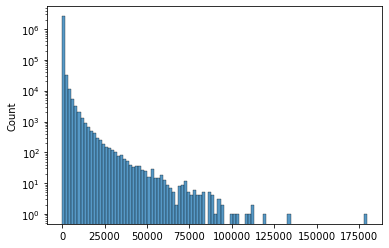

In [20]:
!pip install seaborn
import seaborn as sns
sns.histplot(data=[x+1 for x in articles_lengths], bins=100, log_scale=(False, True))


- What are the top 100 most common english words in the corpus?

<h2 dir="rtl">
 برای گرفتن کلمات انگلیسی کافیست 
 regexای
 بنویسیم که تنها فقط شامل کلمات انگلیسی و اعداد باشد. سپس آن‌ها را براساس تعداد تکرارشان به صورت نزولی مرتب می‌کنیم و ۱۰۰ تای برتر آن‌ها را نمایش می‌دهیم. 
</h2> 


In [21]:
regex_english_words = re.compile('[A-Za-z]+')
english_words = unique_words.filter(lambda x: regex_english_words.match(x[0]) is not None).sortBy(lambda x: -x[1])
english_words.take(100)


[('of', 14726),
 ('The', 9555),
 ('the', 8301),
 ('A', 7606),
 ('http', 7335),
 ('org', 6782),
 ('and', 6608),
 ('s', 6551),
 ('n', 5592),
 ('en', 5340),
 ('de', 5158),
 ('wikipedia', 5109),
 ('a', 4927),
 ('C', 4757),
 ('g', 4740),
 ('x', 4635),
 ('in', 4463),
 ('formula_1', 4432),
 ('B', 4387),
 ('w', 4357),
 ('District', 4063),
 ('Wikipedia', 3858),
 ('index', 3836),
 ('Free', 3810),
 ('www', 3632),
 ('mol', 3606),
 ('to', 3572),
 ('Wikipedia,', 3500),
 ('https', 3497),
 ('Township', 3439),
 ('I', 3354),
 ('S', 3294),
 ('Encyclopedia,', 3289),
 ('contributors,', 3277),
 ('i', 3250),
 ('formula_2', 3215),
 ('accessed', 3215),
 ('com', 3196),
 ('X', 2903),
 ('County', 2876),
 ('County,', 2839),
 ('II', 2812),
 ('III', 2593),
 ('for', 2567),
 ('Canton', 2551),
 ('m', 2548),
 ('formula_3', 2519),
 ('D', 2477),
 ('national', 2362),
 ('T', 2359),
 ('R', 2340),
 ('P', 2332),
 ('E', 2303),
 ('G', 2262),
 ('women', 2229),
 ('L', 2214),
 ('M', 2206),
 ('c', 2163),
 ('formula_4', 2108),
 ('d',

- How many articles contain your first name?!


<h2 dir="rtl">
 برای اینکه جذاب‌تر شود، تمام حالت‌های مختلف اسمم را در نوشته‌ها جست‌و‌جو کردم. از دستور 
 search 
 برای یافتن نوشته‌هایی که شامل اسمم هستند استفاده کردم. سپس تمام آن‌ها را شمردم. 
</h2> 


In [22]:
all_my_first_name = [
    "amir",
    "amir mohammad",
    "امیر",
    "امیرمحمد",
    "امیر محمد",
]
regex_first_name = re.compile(
    '|'.join([f"\\b{x}\\b" for x in all_my_first_name]), flags=re.IGNORECASE)

articles_rdd.filter(lambda x: regex_first_name.search(
    x.title) or regex_first_name.search(x.text)).count()


5360

# Section 4: TF-IDF + Search (40 Points)


<h1 dir="rtl">
 بدست آوردن 
 tf-idf
  کلمات در نوشته‌ها 
</h1> 
<h2 dir="rtl">
 ابتدا کلمات درون نوشته‌ را جدا کرده با دستور 
 flatMap 
 و سپس آن را با کلیدی به صورت 
 (word, id) 
 که شامل خود کلمه و 
 id 
 آن نوشته‌است ذخیره می‌کنیم. سپس با دستور 
 reduceByKey 
 تعداد آن‌ها را می‌شماریم و ذخیره می‌کنیم. 
</h2> 


In [23]:
# (word, id), words_count_in_article
unique_words.unpersist()
articles_words_count = articles_cleaned_rdd.flatMap(lambda x: [((w, x.id), 1) for w in x.text.split(
) + x.title.split()]).reduceByKey(lambda x, y: x+y)
articles_words_count.cache()


PythonRDD[65] at RDD at PythonRDD.scala:53

<h2 dir="rtl">
 بدست آوردن تعداد کل نوشته‌ها 
</h2> 


In [24]:
total_articles = articles_cleaned_rdd.count()

<h2 dir="rtl">
 هر کلمه در چند نوشته استفاده‌شده‌است؟ 
</h2> 
<h3 dir="rtl">
 برای بدست آوردن آن کافیست داده‌های 
 ((word, id), words_count_in_article) 
 را به صورت 
  (word, 1) 
  تبدیل کنیم که نشان‌دهنده این است که این کلمه در این نوشته استفاده شده است. و سپس با دستور 
  reduceByKey 
  تمام آن‌هایی که کلید یکسانی را دارند با هم جمع کنیم تا 
  df 
  بدست آید.
</h3> 


In [26]:
# TODO: calculate document frequncy for each word
# word, df
word_df_rdd = articles_words_count.map(lambda x: (x[0][0], 1)).reduceByKey(lambda x,y: x+y)
word_df_rdd.cache()

PythonRDD[71] at RDD at PythonRDD.scala:53

<h2 dir="rtl">
 بدست آوردن بیشینه تکرار کلمه در هر نوشته 
</h2> 
<h3 dir="rtl">
 در ابتدا دلیل نیاز بودن آن را بیان می‌کنیم. می‌دانیم 
 <span dir="ltr">
   tf-idf(id , word) = tf_func(id, word) * idf(word)
 </span> .
 فرمولی که برای هرکدام از 
 tf_func 
 و 
 idf 
 انتخاب کردیم را در ادامه بررسی می‌کنیم. (مرجع ویکی‌پدیا)  
</h3> 
<h3 dir="ltr">
  tf_func(id, word) = 0.5 + 0.5 * tf(id, word) / max_tf(id)
</h3> 
<h3 dir="ltr">
  idf(word) = log(total_article / df(word))
</h3> 
<h3 dir="rtl">
 در این فرمول 
 tf 
 همان تعداد تکرار یک کلمه در یک نوشته است. و 
 max_tf 
 بیشینه 
 tfهای 
 یک نوشته است. 
</h3> 
<h3 dir="rtl">
 حال مشخص‌تر است که چرا به این 
 rdd 
 نیاز داریم. برای بدست آوردن برای هر نوشته کافیست 
 ((word, id), words_count_in_article) 
 به 
 (id, words_count_in_article)
 تبدیل کنیم و سپس با تابع 
 reduceByKey 
 بیشینه آن‌ها را بگیریم. 
</h3> 






In [27]:
# id, max(words_count_in_article)
max_tf_in_article = articles_words_count.map(lambda x: (x[0][1], x[1])).reduceByKey(lambda x,y : max(x, y))

<h2 dir="rtl">
 در انتهای بدست آوردن 
 tf-idf 
 نیاز داریم که دیکشنری‌ای از کلمات و 
 tf-idf 
 هر نوشته را به خود نوشته 
 join 
 کنیم و 
 کلید 
 vector 
 که شامل دیکشنری کلمه‌ها و 
 tf-idfهای 
 آن‌ها است را اضافه کنیم. بنابراین لیست نوشته‌ها را به صورت 
 (id, article) 
 می‌سازیم.
</h2> 


In [28]:
# id, article
articles_with_key_id = articles_cleaned_rdd.map(lambda x: (x.id, x))

<h2 dir="rtl">
 بعد از درست کردن تمام 
 rddهایی
 که به آن‌ها نیاز داریم، حال زمان آن رسیده‌است که از آن‌ها برای بدست آوردن نوشته‌هایی که کلید جدیدی به آن‌ها اضافه شده‌است که شامل دیکشنری‌ای از کلمات با 
 tf-idf
 آن‌ها است درست شده‌است. 
</h2> 
<h3 dir="rtl">
 برای بدست آوردن آن باید ۵ بار از تابع 
 map
 استفاده کنیم. مرحله به مرحله 
 mapها
 را توضیح می‌دهیم. 
 <div dir="rtl">
   
 </div> 
 
 <ul dir="rtl">
    <li dir="rtl">
     در ابتدا لیست 
     <span dir="ltr">
       ((word, id), words_count_in_article) 
     </span> 
     را به صورت 
     <span dir="ltr">
     (id, (word, words_count_article))         
     </span> 
     در می‌آوریم تا بتوانیم با لیست 
     max_tfها 
     آن را 
     join
     کنیم.
     لیست 
     max_tfها
     به صورت 
     (id, max_tf) 
     است.
    </li> 
     <div dir="rtl">
     </div> 
    <li dir="rtl">
     حال با داشتن تمام آن‌ها می‌توانیم 
     tf_func 
     را بسازیم. کافیست با تابع 
     map 
     آن‌ها را از حالت 
     <span dir="ltr">
     (id, ((word, words_count_in_article), max_tf))        
     </span> 
     به 
     صورت زیر تبدیل کنیم.
    </li> 
     <div dir="ltr">
     (word, (id, tf_func = 0.5 + 0.5 * words_count_in_article / max_tf))  
     </div> 
     <div dir="rtl"> 
     </div> 
     <li dir="rtl">
      دلیل تبدیل کردن آن به صورت کلیدی برابر کلمه 
      join 
      زدن آن با 
      لیست تعداد تکرار کلمه در نوشته‌ها یا 
      (word, df) 
      بود. با چسیدن آن‌ها می‌توانیم 
      tf-idf 
      را با استفاده از همان فرمولی که در بالا توضیح دادیم بدست آوریم. 
     </li> 
     <div dir="rtl"> 
     </div> 
     <li dir="rtl">
      حال لیستی به صورت 
      (id, (word, tf-idf)) 
      داریم. با استفاده از تابع 
      groupByKey 
      تمام آن‌هایی که کلید یکسانی دارند را در لیستی قرار می‌دهیم. اگر این لیست را به تابع 
      dict 
      بدهیم آن را به دیکشنری‌ای که کلید آن کلمه و مقدار آن 
      tf-idf 
      است. پس با استفاده از تابع 
      mapValues 
      مقدار هر کلید را به دیکشنری تبدیل می‌کنیم.   
     </li> 
     <div dir="rtl"> 
     </div> 
     <li dir="rtl">
      حال دیکشنری‌ای که می‌خواستیم را داریم. تنها کافیست آن را به لیست نوشته‌مان بچسبانیم. پس با 
      join 
      آن با 
      (id, article) 
      آن را تبدیل به 
      (id, ({word: tfidf}, article)) 
      می‌رسیم و کافیست با تابع 
      map 
      کلید جدید را اضافه کنیم. 
     </li> 
 </ul> 
 
</h3>


In [29]:
# TODO: add `vector` key to articles_cleaned_rdd dictionary with the tf_idf dictionary

import math


def set_vector_in_article(article, vector):
    return Row(id=article.id, revid=article.revid, url=article.url, text=article.text, title=article.title, vector=vector)


# first map: id, (word, words_count_in_article)
# second map: word, (id, tf_func = 0.5 + 0.5 * word_count_in_article / max_word_count_in_article)
# third map: id, (word, tfidf = tf_func * log(total_articles / df))
# fourth mapValues: id, {word: tfidf}
# fifth map: article with key vector={word: tfidf}
articles_tf_idf_vectors = articles_words_count.map(lambda x: (x[0][1], (x[0][0], x[1]))).join(
    max_tf_in_article).map(lambda x: (x[1][0][0], (x[0], 0.5 + 0.5 * x[1][1]/x[1][0][1]))).join(
        word_df_rdd).map(lambda x: (x[1][0][0], (x[0], x[1][0][1] * math.log(1000/x[1][1])))).groupByKey().mapValues(
            lambda x: dict(list(x))).join(articles_with_key_id).map(lambda x: set_vector_in_article(x[1][1], x[1][0]))
articles_tf_idf_vectors.cache()


PythonRDD[101] at RDD at PythonRDD.scala:53

## Searching


<h2 dir="rtl">
 همان مراحل حذف علائم نگارشی و حذف کلمات بیهوده را برای این نوشته نیز می‌رویم. البته درست است که این نوشته مشخصا شامل چنین علائمی نیست اما کد را به صورت کلی زدم.
 پس از آن با تابع 
 flatMap 
 تمام کلمات آن را بدست می‌آوریم و سپس کلمات آن را می‌شماریم. خروجی به صورت 
 (word, words_count) 
 است. 
</h2> 


In [31]:
from scipy.spatial.distance import cosine

query = 'هخامنشیان ساسانیان هگمتانه'
# TODO: find similar wikipedia articles based on cosine similarity of tf-idf vectors

# word, count
query_words_count = sc.parallelize([Row(text=clean_stop_words_from_str(clean_useless_words(
    query)))]).flatMap(lambda x: [(w, 1) for w in x.text.split()]).reduceByKey(lambda x, y: x+y)


<h2 dir="rtl">
 بیشینه مقدار تعداد بار تکرار را بین کلمات بدست می‌آوریم. مقدار آن معادل 
 max_tf 
 برای هر نوشته در بخش قبل است. 
</h2> 


In [32]:
max_query_word_count = query_words_count.reduce(lambda x,y: x if x[1] >= y[1] else y)


<h2 dir="rtl">
 سپس با داشتن این دو مقدار می‌توانیم به راحتی مقدار 
 tf_func 
 را محاسبه کنیم. برای محاسبه کردن 
 tf-idf 
 نیازمند مقدار 
 df 
 به ازای هر کلمه هستیم. مقادیر آن‌ها را در بخش قبل محاسبه کردیم. با تابع 
 join 
 آن‌ها را به هم متصل می‌کنیم و سپس 
 tf-idf 
 هرکدام از کلمه‌های در نوشته 
 query 
 محاسبه می‌شود. سپس آن را به صورت دیکشنری در می‌آوریم. 
</h2> 
<h2 dir="rtl">
 نکته ریز 
</h2> 
<h3 dir="rtl">
 نکته‌ مهمی در نحوه نگه‌داری مقادیر 
 tf-idf 
 کلمات نوشته‌ها است. اگر به جای اینکار برای تمام کلمات اینکار را می‌کردیم (چه آن‌هایی که در نوشته‌مان است و چه آن‌هایی که در آن نیست.) 
 ، چون تعداد آن‌ها زیاد است به مشکل حافظه خواهیم خورد.
 بنابراین با اینکار در حافظه صرفه‌جویی می‌کنیم.
</h3> 



In [33]:
import math

# first map: word, tf_func
# second map: word, tfidf
query_vector = dict(query_words_count.map(lambda x: (x[0], 0.5 + 0.5 * x[1] / max_query_word_count[1])).join(word_df_rdd).map(
    lambda x: (x[0], x[1][0] * math.log(total_articles/x[1][1]))).sortBy(lambda x: x[0]).collect())


In [35]:
query_vector


{'ساسانیان': 6.610390570517044,
 'هخامنشیان': 7.825228504712084,
 'هگمتانه': 9.845749517558572}

<h2 dir="rtl">
 ابتدا از دیکشنری‌ها لیست تمام کلمات‌ها را بدست می‌آوریم که شامل کلمات نوشته‌ و 
 queryمان
 است. سپس دو دیکشنری جدید می‌سازیم که در ابتدا مقدار آن‌ها صفر است و سپس یکی از آن‌ها را با دیکشنری نوشته و دیگری را با دیکشنری 
 query 
 پر می‌کنیم. به اینصورت مقدار آن‌هایی که در دیکشنری وجود دارد آپدیت می‌شود. حال مقادیر هرکدام از این دو دیکشنری را به لیستی از مقادیر کلید‌های آن‌ها تبدیل می‌کنیم. دقت کنید با این کار ترتیب هر مقدار حفظ می‌شود و دو اندیس از هردو لیست برای یک کلمه است. این دو لیست را به تابع 
 cosine 
 می‌دهیم و سپس آن‌ها را براساس این مقدار به صورت نزولی مرتب می‌کنیم و ۱۰ تای برتر آن‌ها را خروجی می‌دهیم.
</h2> 


In [39]:
def calculate_cosine_distance(article_vector: dict):
    all_words = {}.fromkeys(
        list(article_vector.keys()) + list(query_vector.keys()), 0)
    return cosine(list({**all_words, **article_vector}.values()), list({**all_words, **query_vector}.values()))


top_10_similar = articles_tf_idf_vectors.map(lambda x: (
    x, calculate_cosine_distance(x.vector))).sortBy(lambda x: x[1]).take(10)


In [40]:
top_10_similar

[(Row(id='1165361', revid='206089', url='https://fa.wikipedia.org/wiki?curid=1165361', text='', title='روزنامهٔ هگمتانه', vector={'روزنامهٔ': -0.4427608928518612, 'هگمتانه': 1.9519282213808764}),
  0.32420077540189407),
 (Row(id='1234129', revid='252775', url='https://fa.wikipedia.org/wiki?curid=1234129', text='', title='موزهٔ هگمتانه', vector={'موزهٔ': -0.6744739152943239, 'هگمتانه': 1.9519282213808764}),
  0.3450320279099769),
 (Row(id='4708530', revid='113935', url='https://fa.wikipedia.org/wiki?curid=4708530', text='', title='نبرد اکباتان هگمتانه ', vector={'اکباتان': 1.7037485919053417, 'نبرد': -2.2225673850080145, 'هگمتانه': 1.9519282213808764}),
  0.6037536667018228),
 (Row(id='1152238', revid='113935', url='https://fa.wikipedia.org/wiki?curid=1152238', text='', title='تپهٔ هگمتانه', vector={'تپهٔ': -3.0533405861743046, 'هگمتانه': 1.9519282213808764}),
  0.6267533298566159),
 (Row(id='633842', revid='113935', url='https://fa.wikipedia.org/wiki?curid=633842', text='', title='ریتو